# Data API

- `tf.data`: https://www.tensorflow.org/api_docs/python/tf/data
- `tf.data.datasets`



## tf.data.datasets

In [35]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [36]:
builders = tfds.list_builders()
print(builders)

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'arc', 'bair_robot_pushing_small', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'cmaterdb', 'cnn_dailymail', 'coco', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'cos_e', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'dummy_dataset_shared_generator', 'dummy_mnist', 'emnist', 'eraser_multi_rc', 'esnli', 'eurosat', 'fashion_mnist', 'flic', 'flores', 'food101', 'gap', 'gigaword', 'glue', 'groove', 'higgs', 'horses_or_humans', 'i_naturalist2017', 'image

In [37]:
data, info = tfds.load('mnist', with_info=True)
train_data, test_data = data['train'], data['test']

In [38]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



## tf.data

- 생성
  - `from_tensor_slices()`: 개별 또는 다중 넘파이를 받고, 배치를 지원

  - `from_tensors()`: 배치를 지원하지 않음

  - `from_generator()`: 생성자 함수에서 입력을 취함

- 변환

  - `batch()`: 순차적으로 지정한 배치사이즈로 데이터셋을 분할

  - `repeat()`: 데이터를 복제

  - `shuffle()`: 데이터를 무작위로 섞음

  - `map()`: 데이터에 함수를 적용

  - `filter()`: 데이터를 거르고자 할 때 사용
- 반복
  - `next_batch = iterator.get_next()` 사용

### from_tensor_slices

In [39]:
import numpy as np

In [40]:
num_items = 20
num_list = np.arange(num_items)

In [41]:
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [42]:
num_list_dataset

<TensorSliceDataset shapes: (), types: tf.int64>

In [43]:
for item in num_list_dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(19, shape=(), dtype=int64)


### from_generator()
- 해당 클래스 메서드를 사용하면 생성자에서 데이터셋 생성 가능
- output_types, output_shapes 인수로 출력 자료형과 크기를 지정해주어야 함

In [44]:
import itertools

def gen():
  for i in itertools.count(1):
    yield (i, [1] * i)

dataset = tf.data.Dataset.from_generator(gen,
                                         (tf.int64, tf.int64),
                                         (tf.TensorShape([]), tf.TensorShape([None])))

list(dataset.take(3).as_numpy_iterator())

[(1, array([1])), (2, array([1, 1])), (3, array([1, 1, 1]))]

In [45]:
'''
for item in dataset:
  print(item)
'''

'\nfor item in dataset:\n  print(item)\n'

In [46]:
def gen(stop):
  for i in itertools.count(1):
    if i < stop:
      yield (i, [1] * i)


dataset = tf.data.Dataset.from_generator(gen,args=[10],
                                         output_types =(tf.int64, tf.int64),
                                         output_shapes =(tf.TensorShape([]), tf.TensorShape([None])))

list(dataset.take(5).as_numpy_iterator())

[(1, array([1])),
 (2, array([1, 1])),
 (3, array([1, 1, 1])),
 (4, array([1, 1, 1, 1])),
 (5, array([1, 1, 1, 1, 1]))]

### batch, repeat
- `batch()`: 배치 사이즈 크기
- `repeat()`: 반복 횟수

In [47]:
dataset = num_list_dataset.repeat(3).batch(7)

In [48]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int64)


In [49]:
dataset = num_list_dataset.repeat(3).batch(7, drop_remainder=True)

In [50]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)


### map, filter
- 전처리 단계에서 시행하여 원하지 않는 데이터를 거를 수 있음

- `tf.Tensor` 자료형을 다룸

In [51]:
from tensorflow.data import Dataset

In [52]:
dataset = Dataset.range(1,6)
dataset = dataset.map(lambda x: x*2)
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [53]:
dataset = Dataset.range(5)

result = dataset.map(lambda x: x +1 )
result

<MapDataset shapes: (), types: tf.int64>

In [54]:
elements = [(1,'one'),(2,'two'),(3,'three')]
dataset = Dataset.from_generator(lambda: elements, (tf.int32, tf.string))
result = dataset.map(lambda x_int, y_str:x_int)
list(result.as_numpy_iterator())

[1, 2, 3]

In [55]:
dataset = Dataset.range(3)

def g(x):
  return tf.constant(10.5), tf.constant(['One','Two','Three'])

result = dataset.map(g)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None))

In [56]:
def h(x):
  return 10.5, ['One','Two','Three'], np.array([1.,2.], dtype=np.float64)

result = dataset.map(h)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None),
 TensorSpec(shape=(2,), dtype=tf.float64, name=None))

In [57]:
def i(x):
  return (10.5, [12, 11]), 'One','Two'

result = dataset.map(i)
result.element_spec

((TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(2,), dtype=tf.int32, name=None)),
 TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [58]:
dataset = Dataset.from_tensor_slices([1,2,3,4,5,6,7,8,9,10])
dataset = dataset.filter(lambda x: x < 2)
list(dataset.as_numpy_iterator())

[1]

In [59]:
def filter_fn(x):
  return tf.math.equal(x,1)

dataset = dataset.filter(filter_fn)
list(dataset.as_numpy_iterator())

[1]

### shuffle, take

In [60]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [61]:
train_dataset = dataset['train']
train_dataset = train_dataset.batch(5).shuffle(5).take(2)

for data in train_dataset:
  print(data)

(<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'It was disgusting and painful. What a waste of a cast! I swear, the audience (1/2 full) laughed TWICE in 90 minutes. This is not a lie. Do not even rent it.<br /><br />Zeta Jones was just too mean to be believable.<br /><br />Cusack was OK. Just OK. I felt sorry for him (the actor) in case people remember this mess.<br /><br />Roberts was the same as she always is. Charming and sweet, but with no purpose. The "romance" with John was completely unbelievable.',
       b'This is a straight-to-video movie, so it should go without saying that it\'s not going to rival the first Lion King, but that said, this was downright good.<br /><br />My kids loved this, but that\'s a given, they love anything that\'s a cartoon. The big shock was that *I* liked it too, it was laugh out loud funny at some parts (even the fart jokes*), had lots of rather creative tie-ins with the first movie, and even some jokes that you had to be older to understand (

### get_next()

In [62]:
dataset = Dataset.range(2)
for element in dataset:
  print(element)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [63]:
dataset = Dataset.range(2)
iterator = iter(dataset)

print(dataset)
print(iterator.get_next())
print(iterator.get_next())

<RangeDataset shapes: (), types: tf.int64>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [64]:
a = np.random.randint(0,10, size=(2,3))
dataset = Dataset.from_tensor_slices(a)
print(a)

iterator = iter(dataset)
print(iterator.get_next())

[[1 8 0]
 [0 5 0]]
tf.Tensor([1 8 0], shape=(3,), dtype=int64)


## tf.dataset을 이용한 Fashion-MNIST 분류

### modules import

In [113]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn-white'])

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.fashion_mnist import load_data

### 데이터 로드

In [114]:
(x_train, y_train), (x_test, y_test) = load_data()

In [115]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 데이터 전처리

In [116]:
x_train = x_train / 255.
x_test = x_test / 255.

### tf.data 이용

In [117]:
train_ds = Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

In [118]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

### 데이터 확인

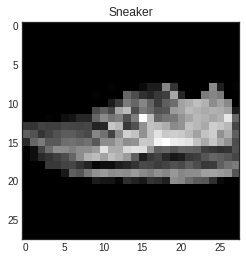

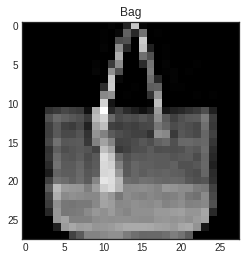

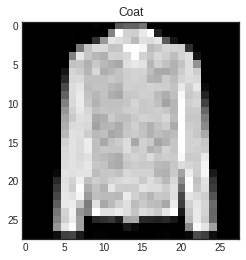

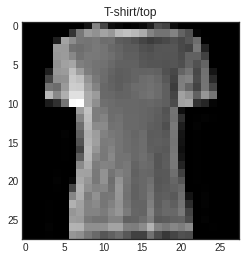

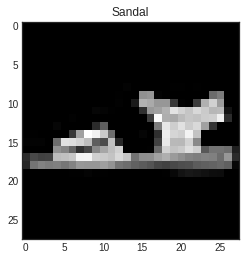

In [119]:
for image, label in train_ds.take(5):
  plt.title('{}'.format(class_names[label[0]]))
  plt.imshow(image[0,:,:], cmap='gray')
  plt.show()

### 모델 생성
- 임의의 모델

In [120]:
def build_model():
  input = Input(shape=(28,28), name = 'input')
  flatten = Flatten(input_shape=[28,28], name='flatten')(input)
  
  hidden1 = Dense(256, kernel_initializer='he_normal', name='hidden1')(flatten)
  hidden1 = BatchNormalization()(hidden1)
  hidden1 = Activation('relu')(hidden1)
  dropout1 = Dropout(0.5)(hidden1)

  hidden2 = Dense(100, kernel_initializer='he_normal', name='hidden2')(dropout1)
  hidden2 = BatchNormalization()(hidden2)
  hidden2 = Activation('relu')(hidden2)
  dropout2 = Dropout(0.5)(hidden2)

  hidden3 = Dense(100, kernel_initializer='he_normal', name='hidden3')(dropout2)
  hidden3 = BatchNormalization()(hidden3)
  hidden3 = Activation('relu')(hidden3)
  dropout3 = Dropout(0.5)(hidden3)

  hidden4 = Dense(50, kernel_initializer='he_normal', name='hidden4')(dropout3)
  hidden4 = BatchNormalization()(hidden4)
  hidden4 = Activation('relu')(hidden4)
  dropout4 = Dropout(0.5)(hidden4)

  output = Dense(10, activation='softmax', name='output')(dropout4)

  model = Model(inputs=[input], outputs=output)

  return model

In [121]:
model = build_model()

In [122]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
activation_12 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 100)              

### 모델 컴파일
- 평가(metrics)방식의 다른 방법
  - `tf.keras.metrics.Mean`
  - `tf.keras.metrics.SparseCategoricalAccuracy`

- 위 두 방식을 사용하여 loss값을 좀 더 smooth하게 만들기(평균을 내는 방식)

In [123]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [124]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### 모델 학습

@tf.function 으로 인해 학습이 시작되면 그래프를 생성하여 속도가 빠름


In [125]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [126]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [128]:
epochs = 20

for epoch in range(epochs):
  for images, labels in train_ds:
    train_step(images,labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epochs {:3d}\tLoss {:.4f}\tAccuracy: {:.4f}\tTest Loss: {:.4f}\Test Accuracy: {:.4f}\t'
  print(template.format(epoch + 1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

Epochs   1	Loss 0.3972	Accuracy: 85.4970	Test Loss: 0.4116\Test Accuracy: 84.9300	
Epochs   2	Loss 0.3755	Accuracy: 86.2240	Test Loss: 0.3956\Test Accuracy: 85.4900	
Epochs   3	Loss 0.3595	Accuracy: 86.7903	Test Loss: 0.3858\Test Accuracy: 85.9260	
Epochs   4	Loss 0.3461	Accuracy: 87.2619	Test Loss: 0.3804\Test Accuracy: 86.1450	
Epochs   5	Loss 0.3345	Accuracy: 87.6682	Test Loss: 0.3738\Test Accuracy: 86.4371	
Epochs   6	Loss 0.3248	Accuracy: 87.9939	Test Loss: 0.3686\Test Accuracy: 86.6725	
Epochs   7	Loss 0.3160	Accuracy: 88.3043	Test Loss: 0.3644\Test Accuracy: 86.8689	
Epochs   8	Loss 0.3081	Accuracy: 88.5701	Test Loss: 0.3614\Test Accuracy: 86.9880	
Epochs   9	Loss 0.3010	Accuracy: 88.8222	Test Loss: 0.3596\Test Accuracy: 87.0855	
Epochs  10	Loss 0.2941	Accuracy: 89.0659	Test Loss: 0.3575\Test Accuracy: 87.2200	
Epochs  11	Loss 0.2878	Accuracy: 89.2854	Test Loss: 0.3574\Test Accuracy: 87.2846	
Epochs  12	Loss 0.2820	Accuracy: 89.4934	Test Loss: 0.3578\Test Accuracy: 87.3357	
Epoc

### 모델 학습 : 2번째 방법 (Keras)

In [82]:
from sklearn.model_selection import train_test_split

In [86]:
(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=777)

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

model = build_model()
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

(42000, 28, 28)
(42000,)
(18000, 28, 28)
(18000,)
(10000, 28, 28)
(10000,)
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_____________________________________________

5~6분 소요

In [87]:
from tensorflow.keras.callbacks import EarlyStopping

In [88]:
early_stopping_cb = EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=200,
                    shuffle=True,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping_cb])

Epoch 1/200
165/165 [==============================] - 3s 19ms/step - loss: 2.5916 - accuracy: 0.1377 - val_loss: 2.0525 - val_accuracy: 0.3872
Epoch 2/200
165/165 [==============================] - 3s 17ms/step - loss: 2.2028 - accuracy: 0.2135 - val_loss: 1.7548 - val_accuracy: 0.5276
Epoch 3/200
165/165 [==============================] - 3s 20ms/step - loss: 1.9882 - accuracy: 0.2775 - val_loss: 1.5785 - val_accuracy: 0.5583
Epoch 4/200
165/165 [==============================] - 4s 21ms/step - loss: 1.8316 - accuracy: 0.3270 - val_loss: 1.4570 - val_accuracy: 0.5817
Epoch 5/200
165/165 [==============================] - 3s 17ms/step - loss: 1.7103 - accuracy: 0.3746 - val_loss: 1.3574 - val_accuracy: 0.6072
Epoch 6/200
165/165 [==============================] - 3s 16ms/step - loss: 1.6195 - accuracy: 0.4025 - val_loss: 1.2817 - val_accuracy: 0.6342
Epoch 7/200
165/165 [==============================] - 3s 17ms/step - loss: 1.5400 - accuracy: 0.4264 - val_loss: 1.2085 - val_accuracy:

In [89]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 모델 평가

In [90]:
model.evaluate(x_test, y_test, batch_size=100)

100/100 [==============================] - 0s 4ms/step - loss: 0.5051 - accuracy: 0.8199


[0.5051056146621704, 0.8198999762535095]

### 결과 확인

In [91]:
test_img = x_test[0,:,:]
print(test_img.shape)

(28, 28)


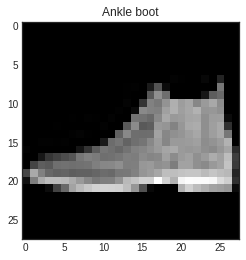

In [92]:
plt.title(class_names[y_test[0]])
plt.imshow(test_img,cmap='gray')
plt.show()

In [93]:
pred = model.predict(test_img.reshape(1,28,28))

In [94]:
pred.shape

(1, 10)

In [95]:
pred

array([[2.9175857e-05, 8.5275078e-06, 1.5786284e-04, 5.2229698e-05,
        1.8905080e-04, 3.9150409e-02, 9.5297437e-05, 1.3614644e-01,
        5.4701028e-04, 8.2362401e-01]], dtype=float32)

In [96]:
class_names[np.argmax(pred)]

'Ankle boot'

### Test Batch Dataset

In [97]:
test_batch = x_test[:32,:,:]
test_batch_y = y_test[:32]
print(test_batch.shape)

(32, 28, 28)


In [98]:
preds = model.predict(test_batch)
preds.shape

(32, 10)

In [99]:
preds_arg = np.argmax(preds, -1)

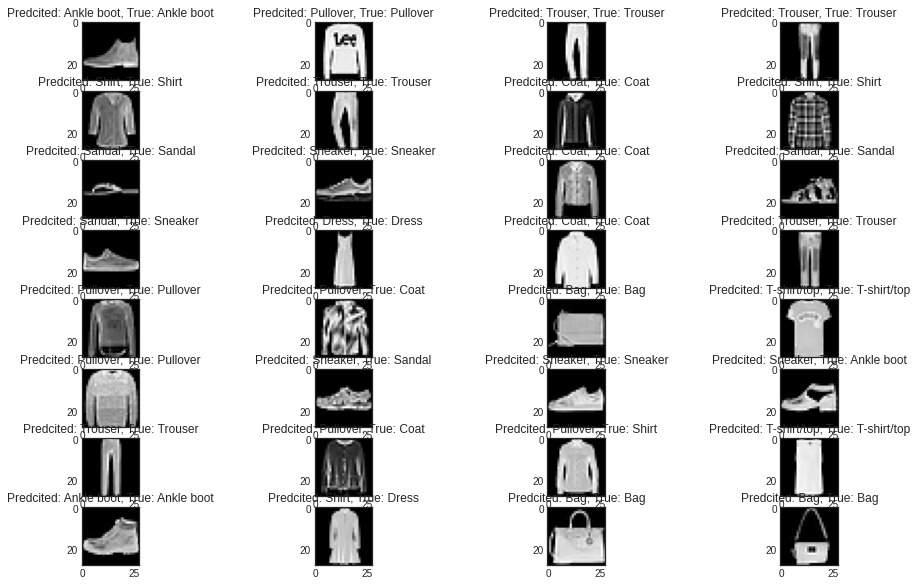

In [100]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(16,10))

for idx in range(1,33,1):
  plt.subplot(num_rows, num_cols, idx)
  plt.title('Predcited: {}, True: {}'.format(class_names[preds_arg[idx-1]],
                                             class_names[test_batch_y[idx-1]]))
  plt.imshow(test_batch[idx-1], cmap='gray')

plt.show()